In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

In [2]:
def get_missing_val(data):

    no_null_data = list()
    null_data = list()

    # Check Null in Age Category
    print('Group on Age Category')
    for i in data.groupby('age_category'):
        if( i[1].isnull().any().any()):
            null_data.append(i[0])
        else:
            no_null_data.append(i[0])

    print('Null data present in: ', null_data)
    print('No null data present in: ', no_null_data)
    null_data.clear()
    no_null_data.clear()

    # Check Null in Race Category
    print('Group on Race Category')
    for i in data.groupby('race_category'):
        if( i[1].isnull().any().any()):
            null_data.append(i[0])
        else:
            no_null_data.append(i[0])

    print('Null data present in: ', null_data)
    print('No null data present in: ', no_null_data)
    null_data.clear()
    no_null_data.clear()

    # Check Null in sex Category
    print('Group on sex Category')
    for i in data.groupby('sex_category'):
        if( i[1].isnull().any().any()):
            null_data.append(i[0])
        else:
            no_null_data.append(i[0])

    print('Null data present in: ', null_data)
    print('No null data present in: ', no_null_data)
    null_data.clear()
    no_null_data.clear()

In [3]:
def season_alignment(data, start_week = 40, end_week = 17):
    season_data = data.groupby('season')
    df_list = list()
    for i in season_data:
        temp = i[1].drop(i[1][((i[1]['week'] < start_week) & (i[1]['year'] == int(i[0][:4]))) | ((i[1]['week'] > end_week) & (i[1]['year'] == int(i[0][:4]) + 1))].index)

        df_list.append(temp)

    df = pd.concat(df_list)

    return df


In [4]:
# Read raw data file
data = pd.read_csv('FlusurvNet.csv')

# Rename the cols
data.rename(columns={'WEEKLY RATE ': 'weekly_rate', 'CATCHMENT':'region', 'NETWORK':'network', 'YEAR':'season', 'MMWR-YEAR':'year', 'MMWR-WEEK':'week', 'CUMULATIVE RATE':'cumulative_rate',
                         'AGE CATEGORY': 'age_category', 'SEX CATEGORY': 'sex_category', 'RACE CATEGORY': 'race_category'}, inplace=True)

# Create a new col to have unique index for each season
data['year_week'] = data['year']*100 + data['week']

# Drop season 2020-21 - Covid season ... complete data is not available
new_data = data[data['season'] != '2020-21']

# Print missing values
reg_data = new_data.groupby(['region', 'network'])
final_df_list = list()

for rd in reg_data:
    print(rd[0])
    sea_data = rd[1].groupby('season')
    for sd in sea_data:
        print(sd[0])
        get_missing_val(sd[1])
        print('\n')

    # Align the data
    aligned_data = season_alignment(rd[1])
    final_df_list.append(aligned_data)
    print(aligned_data.groupby('season').first())
    print(aligned_data.groupby('season').last())
    print('\n')

final_df = pd.concat(final_df_list)
final_df.to_csv('merged_data.csv', index=False)


('California', 'EIP')
2009-10
Group on Age Category
Null data present in:  []
No null data present in:  ['0-4 yr', '12-17 yr', '18-29 yr', '18-49 yr', '30-39 yr', '40-49 yr', '5-11  yr', '5-17 yr', '50-64 yr', '65+ yr', '65-74 yr', '75-84 yr', '85+', '< 18', '>= 18', 'Overall']
Group on Race Category
Null data present in:  []
No null data present in:  ['American Indian/Alaska Native', 'Asian/Pacific Islander', 'Black', 'Hispanic/Latino', 'Overall', 'White']
Group on sex Category
Null data present in:  []
No null data present in:  ['Female', 'Male', 'Overall']


2010-11
Group on Age Category
Null data present in:  []
No null data present in:  ['0-4 yr', '12-17 yr', '18-29 yr', '18-49 yr', '30-39 yr', '40-49 yr', '5-11  yr', '5-17 yr', '50-64 yr', '65+ yr', '65-74 yr', '75-84 yr', '85+', '< 18', '>= 18', 'Overall']
Group on Race Category
Null data present in:  []
No null data present in:  ['American Indian/Alaska Native', 'Asian/Pacific Islander', 'Black', 'Hispanic/Latino', 'Overall', '

In [ ]:
final_df

,region,network,season,year,week,age_category,sex_category,race_category,cumulative_rate,weekly_rate,year_week
489,California,EIP,2009-10,2009,40,Overall,Overall,White,2.5,1.1,200940
490,California,EIP,2009-10,2009,40,Overall,Overall,Black,5.7,2.9,200940
491,California,EIP,2009-10,2009,40,Overall,Overall,Hispanic/Latino,3.8,1.6,200940
492,California,EIP,2009-10,2009,40,Overall,Overall,Asian/Pacific Islander,1.5,0.7,200940
493,California,EIP,2009-10,2009,40,Overall,Female,Overall,3.1,1.5,200940
...,...,...,...,...,...,...,...,...,...,...,...
109501,New York - Rochester,EIP,2022-23,2023,13,>= 18,Overall,Overall,87.2,0.3,202313
109513,New York - Rochester,EIP,2022-23,2023,14,>= 18,Overall,Overall,87.9,0.7,202314
109526,New York - Rochester,EIP,2022-23,2023,15,>= 18,Overall,Overall,88.1,0.2,202315
109529,New York - Rochester,EIP,2022-23,2023,16,>= 18,Overall,Overall,88.3,0.2,202316


In [5]:
def display_data (data, rate = 'weekly_rate', age_cat = 'Overall', race_cat = 'Overall', sex_cat = 'Overall'):
    temp_data = data[(data['age_category'] == age_cat) & (data['sex_category'] == sex_cat) & (data['race_category'] == race_cat)]
    for t in temp_data.groupby(['region', 'network']):
        plt.figure(figsize=(17,7))
        for ind, s in enumerate(t[1].groupby('season')):
            if ind < 7:
                sns.lineplot(x = s[1]['week'].astype(str) ,y = s[1][rate], label=s[0], linestyle='-')
            else:
                sns.lineplot(x = s[1]['week'].astype(str) ,y = s[1][rate], label=s[0], linestyle='--')


        plt.title( t[0], fontsize=24)
        plt.show()


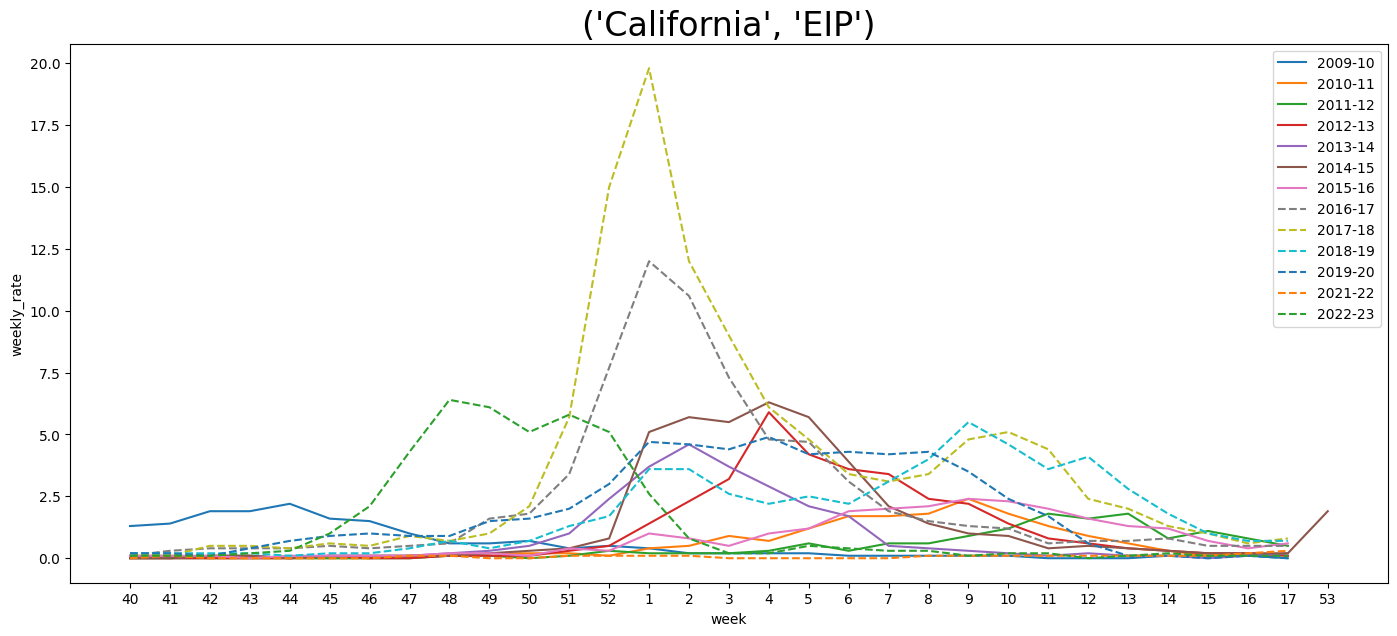

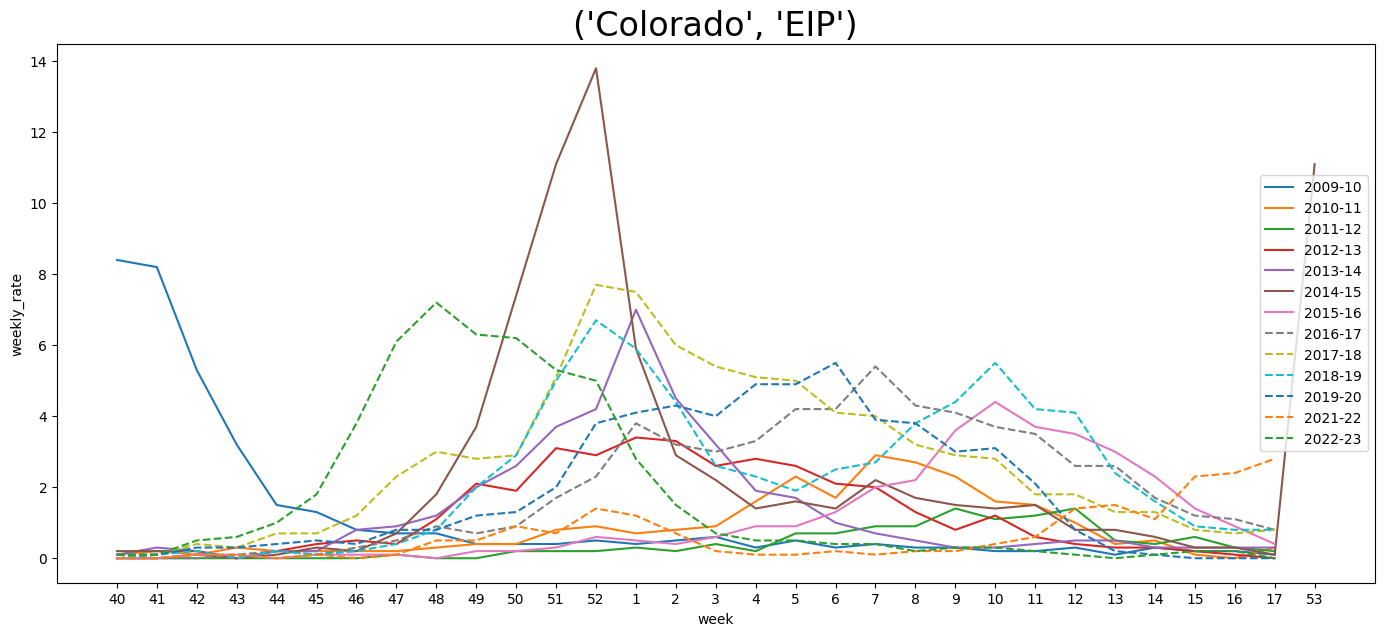

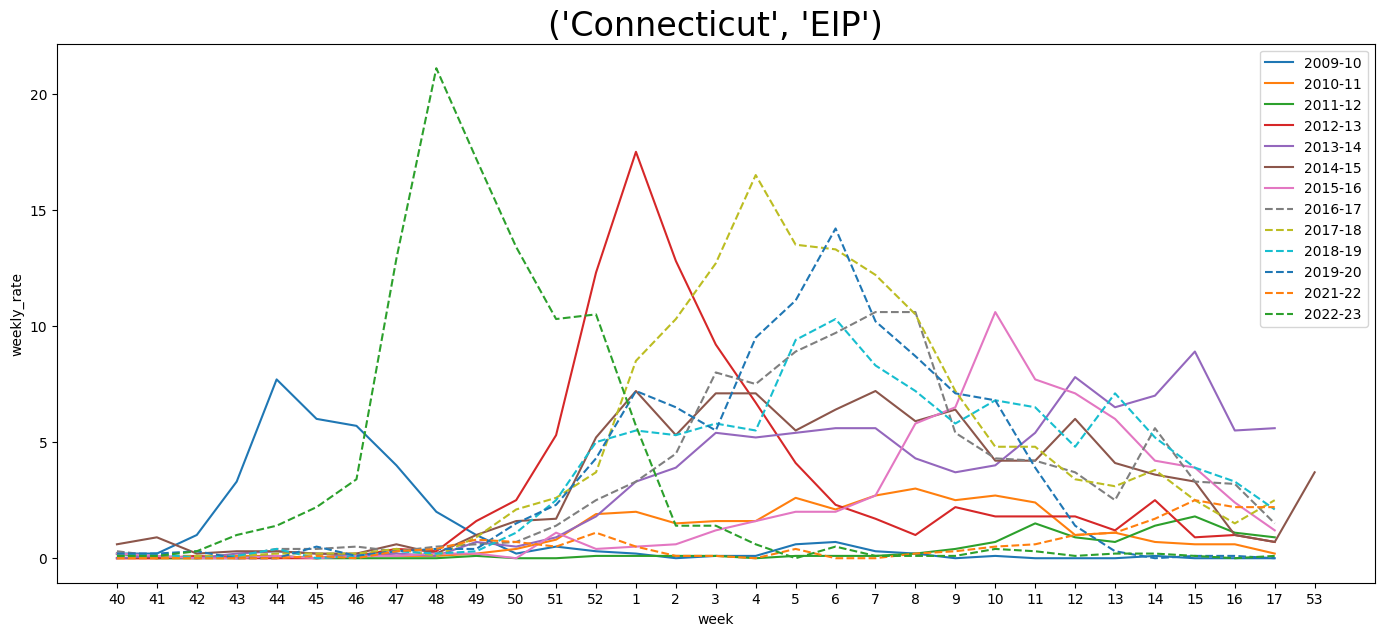

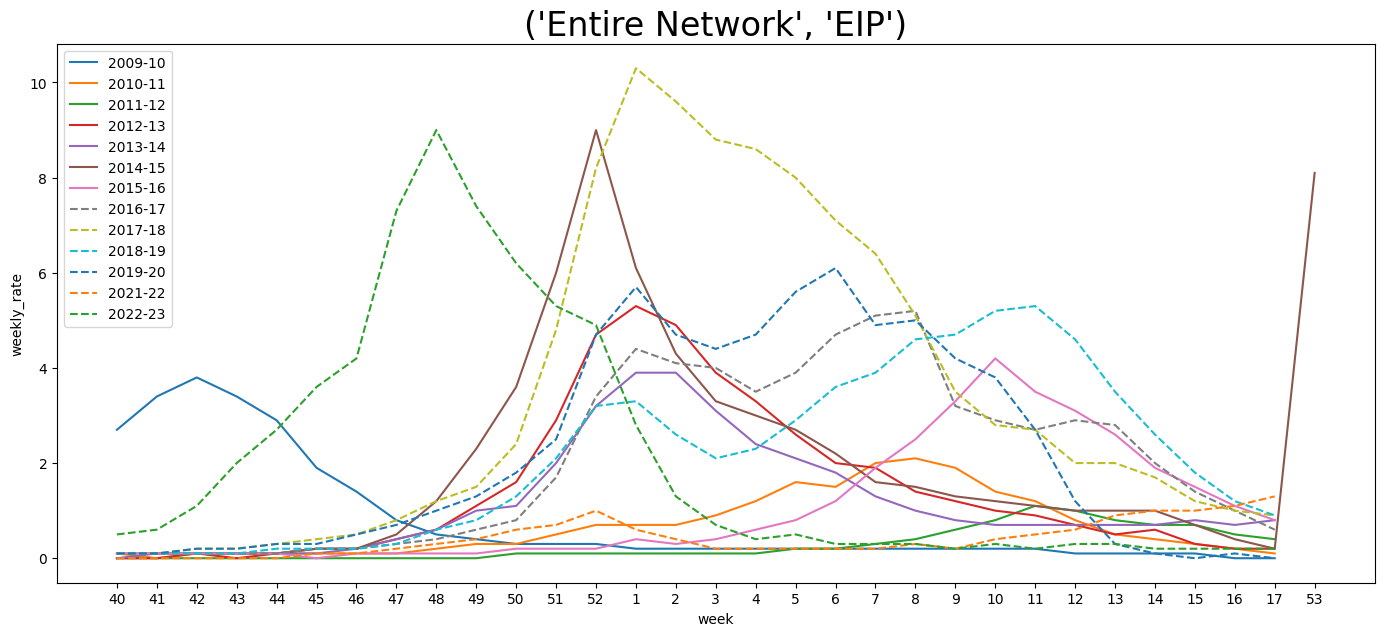

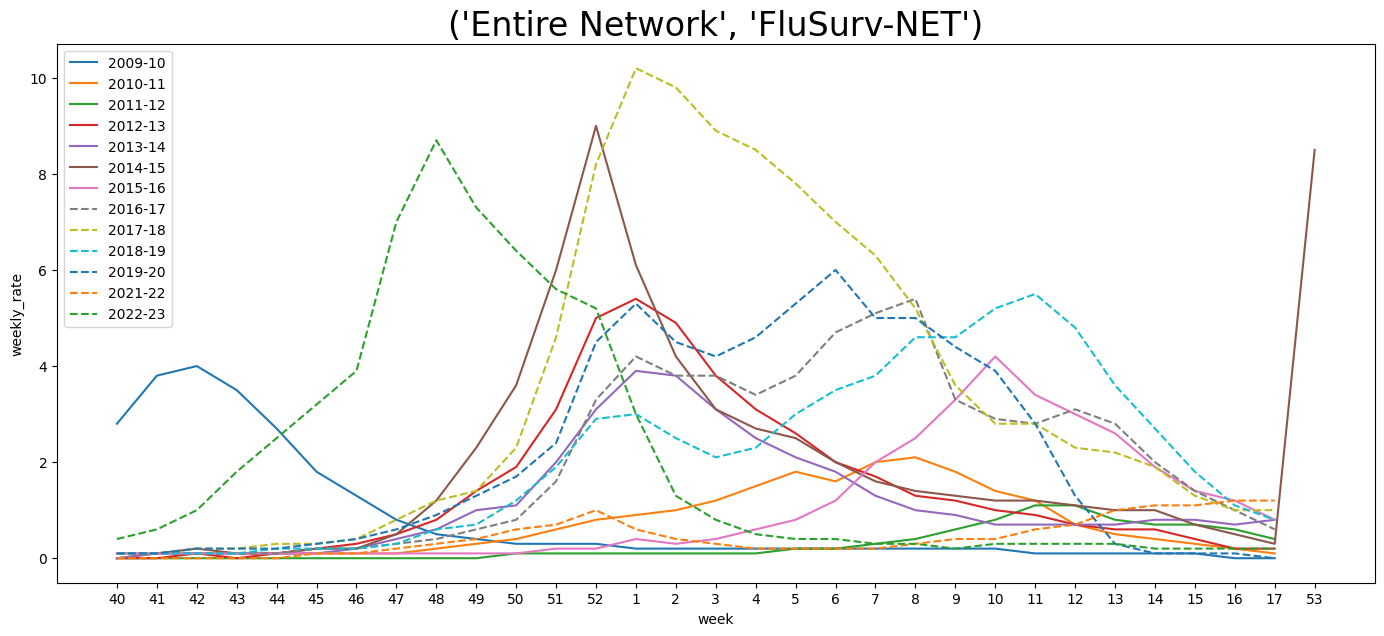

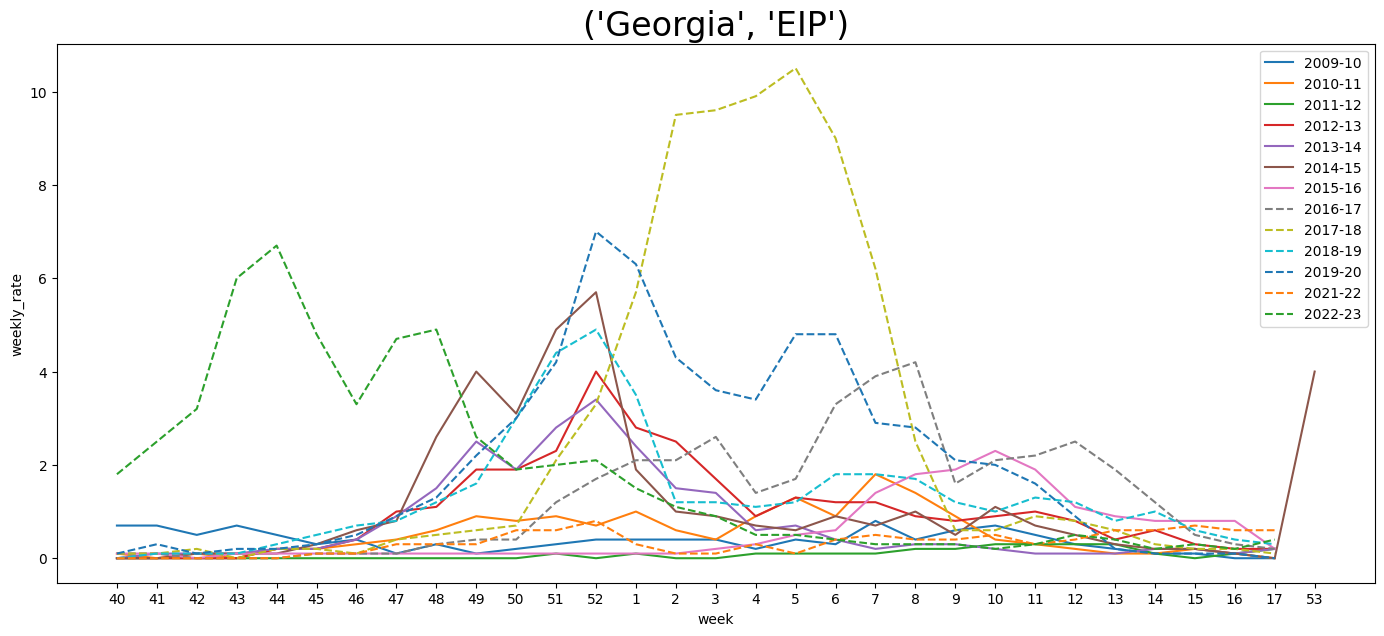

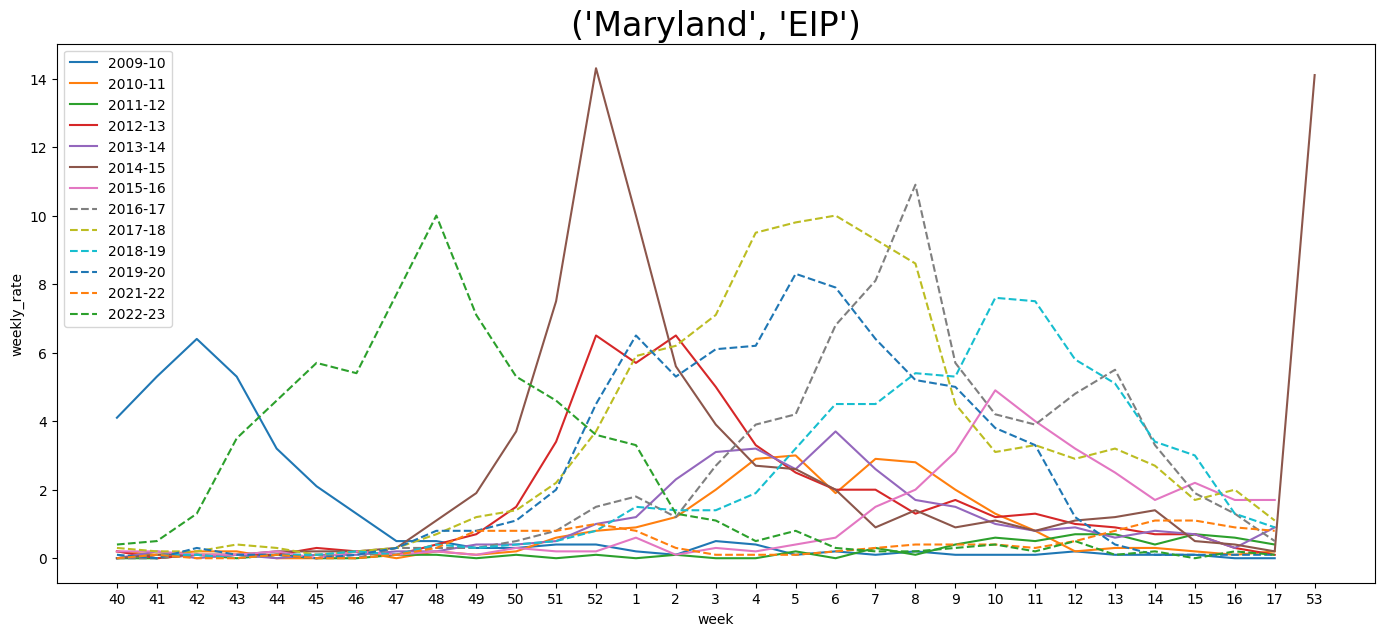

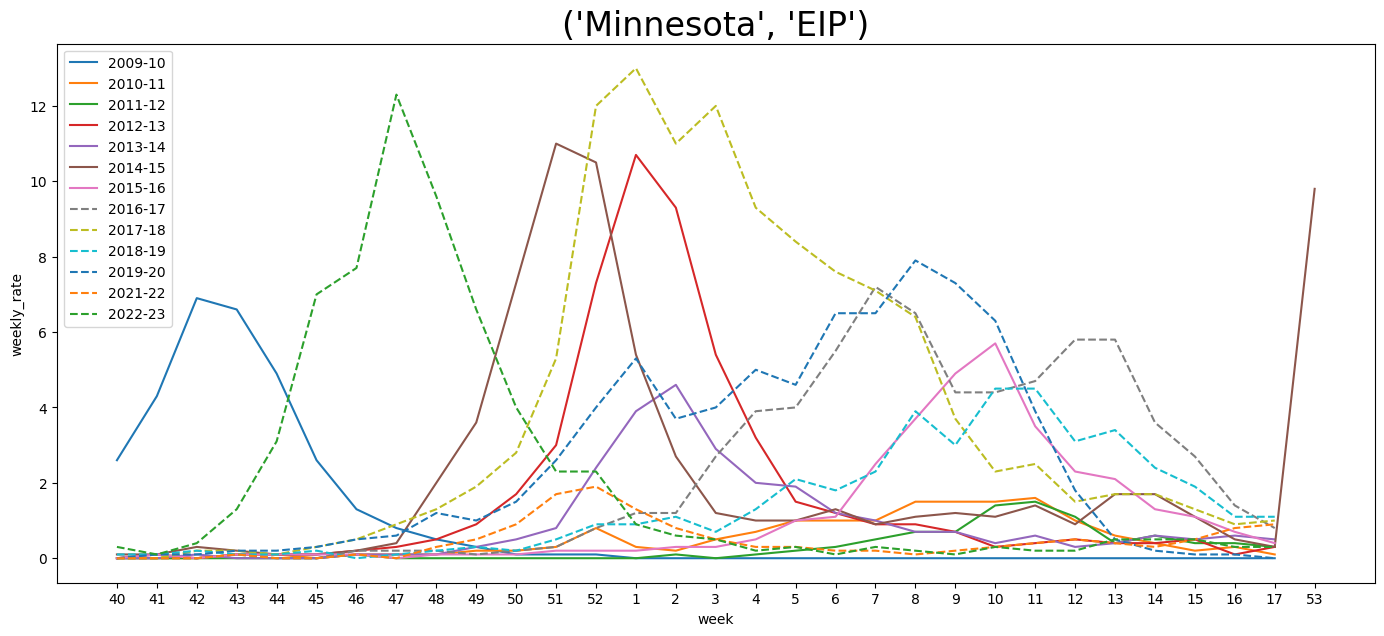

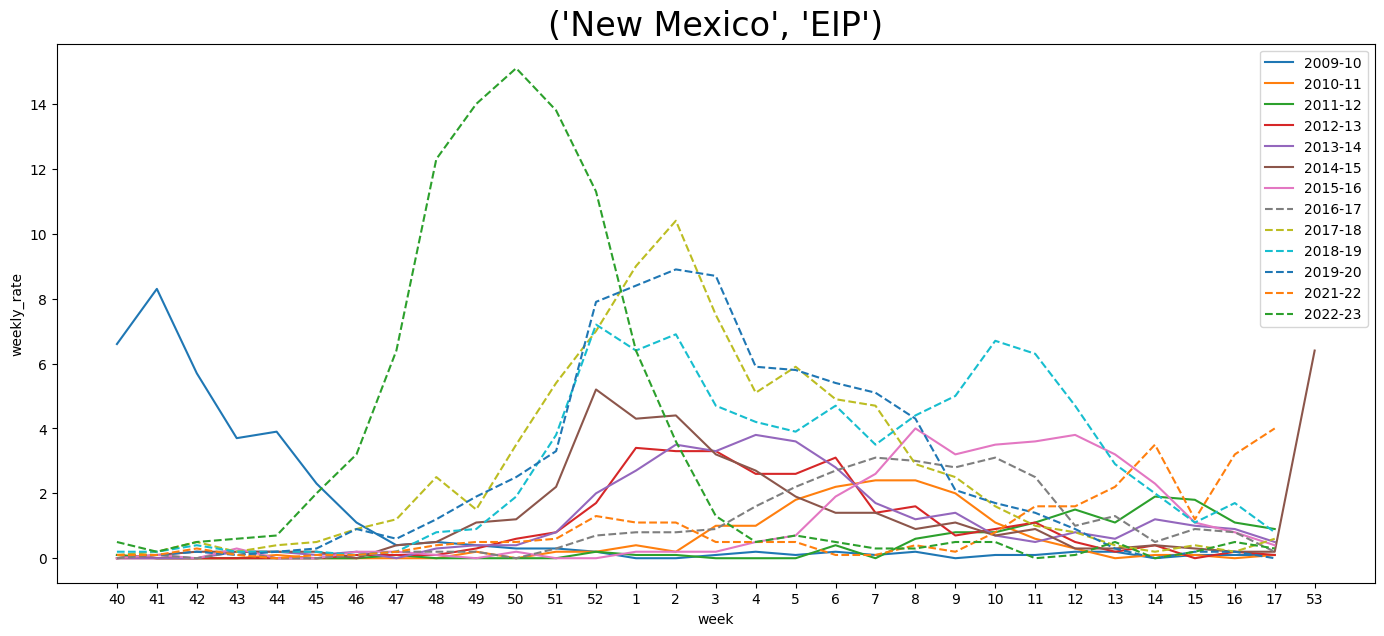

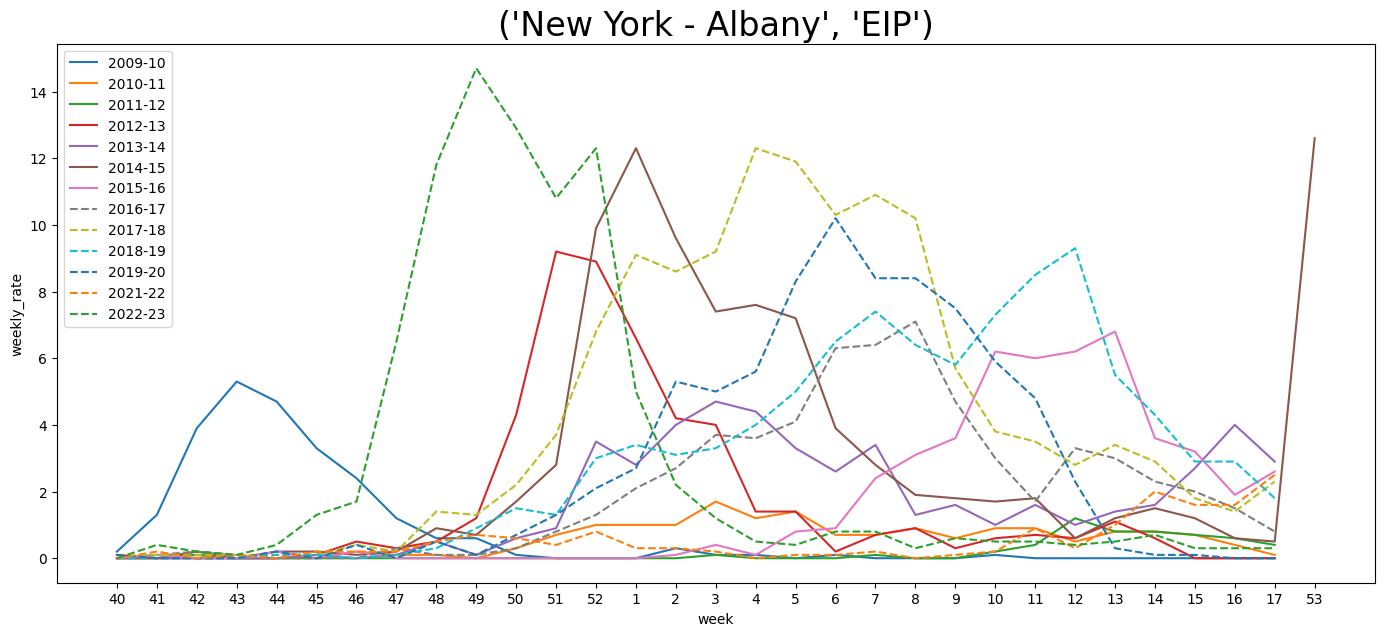

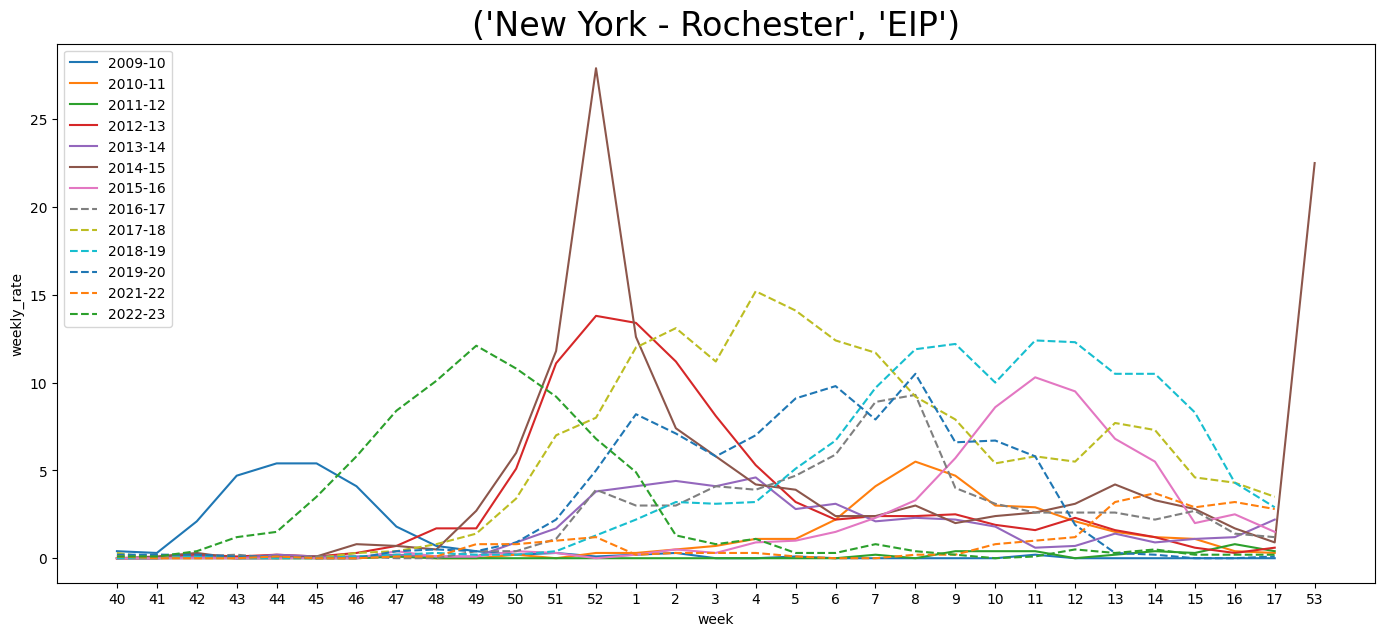

In [6]:
display_data(final_df)